In [1]:
from datascience import *
%matplotlib inline
from path_data_variable import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [2]:
births = Table.read_table(path_data + 'baby.csv')

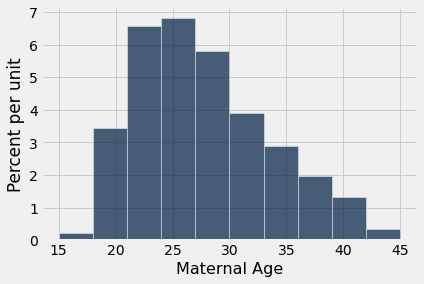

In [3]:
births.select('Maternal Age').hist()

In [4]:
hodgkins = Table.read_table(path_data + 'hodgkins.csv')

In [5]:
hodgkins.show(3)

In [6]:
hodgkins = hodgkins.with_columns(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)

In [7]:
hodgkins

height | rad  | chemo | base   | month15 | drop
164    | 679  | 180   | 160.57 | 87.77   | 72.8
168    | 311  | 180   | 98.24  | 67.62   | 30.62
173    | 388  | 239   | 129.04 | 133.33  | -4.29
157    | 370  | 168   | 85.41  | 81.28   | 4.13
160    | 468  | 151   | 67.94  | 79.26   | -11.32
170    | 341  | 96    | 150.51 | 80.97   | 69.54
163    | 453  | 134   | 129.88 | 69.24   | 60.64
175    | 529  | 264   | 87.45  | 56.48   | 30.97
185    | 392  | 240   | 149.84 | 106.99  | 42.85
178    | 479  | 216   | 92.24  | 73.43   | 18.81
... (12 rows omitted)

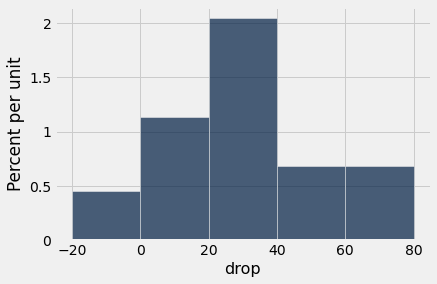

In [8]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [9]:
np.average(hodgkins.column('drop'))

28.615909090909096

In [10]:
def one_bootstrap_mean():
    resample = hodgkins.sample()
    return np.average(resample.column('drop'))

In [11]:
# Generate 10,000 bootstrap means
num_repetitions = 10000
bstrap_means = make_array()
for i in np.arange(num_repetitions):
    bstrap_means = np.append(bstrap_means, one_bootstrap_mean())

In [12]:
# Get the endpoints of the 99% confidence interval
left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

make_array(left, right)

array([17.46863636, 40.97681818])

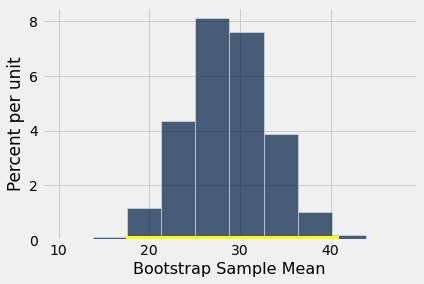

In [13]:
resampled_means = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist()
plots.plot([left, right], [0, 0], color='yellow', lw=8);